# Lab 2: Linear Regression

## Problem 1: Choosing The Right Loss Function

This lecture, we talked about _loss functions_. As a reminder, loss functions are mathematical functions that tell you "how
many bad" a model's output was. We use these functions as a way to tell when
our models are becoming more accurate. Because the loss function's output is
just a number, we can teach computers to choose the best model based on their
loss value (ie: the loss of their predictions).

Eg: Suppose I have a model predicting how many hamburgers I will eat tomorrow.
If our model's prediction `y` was 2, the correct result `c` was 1, and our loss
function is $L(y, c) = (y - c)^2$, our prediction's loss is $(2-1)^2 = 4$.
This isn't an accurate model, so I change its $\beta$ and try predicting again.
This time, the prediction is exactly correct! Our loss would be
$L(1, 1) = (1-1)^2 = 0$.
Our computer sees that the second model is more accurate, and will choose it as
the "better" model. Notice how a _low_ loss function corresponds to a more
accurate model!

During lecture, we used MSE (Mean Squared Error) as a loss function for linear
regression. Let's try making a loss function for a more realistic case.

Professor Sun wants to make her life as pleasant as possible. She decides to
use her vast powers of Machine Learning to achieve this goal. Through intense
research, she creates a model that tells her what to do in order to have the
"best" day possible. This model will try to minimize a loss function $L$.

Professor Sun likes 2 things in life: eating meals, and teaching students. So she writes $m$ as
the number of meals she eats per day, $s$ as the number of students she's
helped on a given day, and gives the computer a loss function $L$ to minimize:

$$
L() := \frac{1}{\text{number of meals eaten} + \text{number of students helped}}
$$

She can only eat 3 meals per day, and only has 3 students in her class. $m$ and $s$ must be non-negative.

### Part A

Do you think this is a good loss function? Can you see a scenario where this machine learning model might lead to an unhealthy lifestyle?

(Hint: Would you rather eat 3 meals and teach 3 students every day, or eat 0 meals and teach 6 students every day)?

WRITE YOUR ANSWER HERE

### Part B

Can you think of a "better" loss function that avoids the problem you chose in Part A? There's no "one-good-answer" here -- your loss function will line up with your personal priorities.

WRITE YOUR ANSWER HERE

## Problem 2: SciKit-Learn


# Overview

* SciKit-Learn is a Machine learning library written in Python

* It's simple and efficient, for both experts and non-experts.

* Contains classical, well-established machine learning algorithms.

* Shipped with documentation and examples.

* Documentation: https://scikit-learn.org/dev/index.html

* Examples: https://scikit-learn.org/dev/auto_examples/index.html

* Take a second to look at some of the examples! Hopefully you can draw some inspiration from the results this library can produce.

# Regression

Today we are going to use SciKit-Learn to implement regression.

LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:

$ \min_{w} || X w - y||_2^2 $


Here's an example of a linear regression.

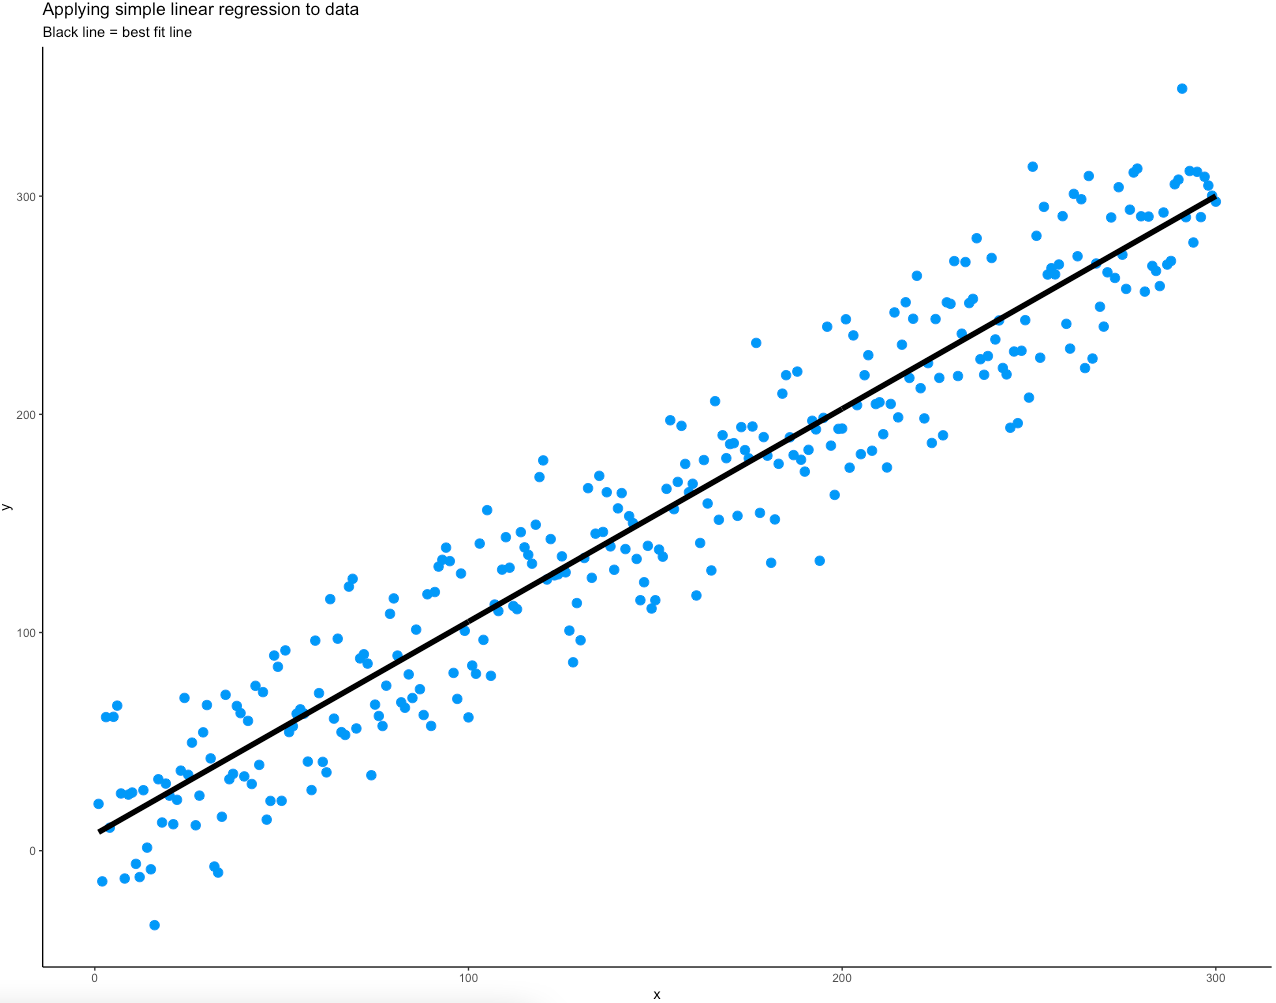

Does that equation look scary? Don't worry. These days, we have plenty of _libraries_ (pieces of code that other people write for us) that can do the math for us. Sklearn allows us to do linear regression without having to solve all of those matrix equations.

LinearRegression will take in its `fit` method arrays X, y. These are the features and the responses.

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

: 

In [ ]:
# And below, we can retrieve the Beta0 and Beta1!
# Easy peasy!

: 

In [ ]:
reg.coef_

: 

Here's some helpful documentation about other features: https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

# Example

Okay, now let's do an _actual_ example with some data.

Let's consider a scenario where we want to determine the linear relationship between the numbers of hours a student studies and the percentage of marks that student scores in an exam. We want to find out that given the number of hours a student prepares for a test, about how high of a score can the student achieve? If we plot the independent variable (hours) on the x-axis and dependent variable (percentage) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.

We know that the equation of a straight line is basically:

$ y = mx + b $

Where b is the intercept and m is the slope of the line. So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept and slope. There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

To import necessary libraries for this task, execute the following import statements:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

: 

The dataset being used for this example has been made publicly available and can be downloaded from this link:

https://drive.google.com/open?id=1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw

The following command imports the CSV dataset using pandas:

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/student_scores.csv')

: 

Did it work? If not, don't forget to mount your drive!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

: 

Now let's explore our dataset a bit. To do so, execute the following script:

In [ ]:
dataset.shape

: 

***Does anyone know what this output means? What does it tell us?***

In [ ]:
dataset.head(25)

: 

***How about this?***

To see statistical details of the dataset, we can use describe():

In [ ]:
dataset.describe()

: 

And finally, let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [ ]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

: 

***What do you notice?***

Now we have an idea about statistical details of our data. The next step is to divide the data into "attributes" and "labels". Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset we only have two columns. We want to predict the percentage score depending upon the hours studied. Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. To extract the attributes and labels, execute the following script:

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

: 

The attributes are stored in the X variable. We specified "-1" as the range for columns since we wanted our attribute set to contain all the columns except the last one, which is "Scores". Similarly the y variable contains the labels. We specified 1 for the label column since the index for "Scores" column is 1. Remember, the column indexes start with 0, with 1 being the second column. In the next section, we will see a better way to specify columns for attributes and labels.

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

: 

***Why do we split into training and testing sets? Can't we just have one?***

Now it is finally the time to train our algorithm. Execute following command:

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

: 

To retrieve the intercept:

In [ ]:
print(regressor.intercept_)

: 

For retrieving the slope (coefficient of x):

In [ ]:
print(regressor.coef_)

: 

***What do these two numbers mean? Remember our equation from above.***

Now that we have trained our algorithm, it's time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make pre-dictions on the test data, execute the following script:

In [ ]:
y_pred = regressor.predict(X_test)

: 

The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.

To compare the actual output values for X_test with the predicted values, execute the following script:

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

: 

To define how off we are more rigorously, we can use things like MSE

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_test = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse_test)
r2 = r2_score(y_test, y_pred)

print("%-12s %f" % ('MSE:', mse_test))
print("%-12s %f" % ('RMSE:', rmse))
print("%-12s %f" % ('R2:', r2))

: 

In [ ]:
regressor.score(X_test,y_test)

: 

***How close did we get? What ideas do you know to improve it?***

One way would be to increase the degree

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge # Lets try Ridge Regression Variance instead of Least Squares now

x_plot = np.linspace(0, 10, 100)
X_plot = x_plot[:, np.newaxis]

poly1 = make_pipeline(PolynomialFeatures(2), Ridge()) # degree 2
poly1.fit(X_train, y_train)
y_plot1 = poly1.predict(X_plot)

poly2 = make_pipeline(PolynomialFeatures(3), Ridge()) # degree 3
poly2.fit(X_train, y_train)
y_plot2 = poly2.predict(X_plot)

poly3 = make_pipeline(PolynomialFeatures(4), Ridge()) # degree 4
poly3.fit(X_train, y_train)
y_plot3 = poly3.predict(X_plot)

plt.plot(x_plot, y_plot3, linewidth=2, label="degree 4")
plt.plot(x_plot, y_plot2, linewidth=2, label="degree 3")
plt.plot(x_plot, y_plot1, linewidth=2, label="degree 2")
plt.scatter(X, y)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend(loc='lower left')
plt.show()

: 

Can we keeping increasing the degree to closer and closer? Why or why not?

We can also try increasing the number of variables from just the hours studied to include other factors like age, grade level, height. The resulting model would be much more complicated and wouldn't be easily visualized using matplotlib as it would be multi-dimensional.